In [1]:
import time
import os
import copy
import argparse
import pdb
import collections
import sys

import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
from torchvision import datasets, models, transforms
import torchvision

import model
from anchors import Anchors
import losses
from dataloader import CocoDataset, CSVDataset, collater, Resizer, AspectRatioBasedSampler, Augmenter, UnNormalizer, Normalizer
from torch.utils.data import Dataset, DataLoader

# import coco_eval
import csv_eval

In [3]:
dataset_train = CSVDataset(train_file='./csv_annotations.csv', class_list='./classes.csv', transform=transforms.Compose([Normalizer(), Augmenter(), Resizer()]))

In [4]:
sampler = AspectRatioBasedSampler(dataset_train, batch_size=2, drop_last=False)


In [5]:
dataloader_train = DataLoader(dataset_train, num_workers=3, collate_fn=collater, batch_sampler=sampler)


In [7]:
data_iter = iter(dataloader_train)

In [8]:
d = next(data_iter)

In [10]:
d.keys()

dict_keys(['img', 'annot', 'scale'])

In [14]:
dn = d['img'].numpy().transpose((0,2,3,1))

In [16]:
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


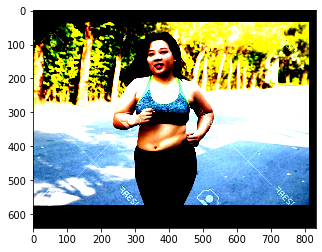

In [26]:
plt.imshow(dn[1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


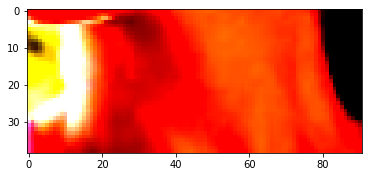

In [32]:
plt.imshow(dn[0][82:121,620:711,:])

In [28]:
dn[1].shape

(640, 832, 3)

In [29]:
d['annot'][0]

tensor([[620.6667,  82.3333, 711.8666, 121.6000,   0.0000],
        [589.0000, 320.4667, 780.2667, 371.1333,   1.0000],
        [551.0000, 447.1333, 809.4000, 510.4667,   2.0000]])